In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diagnosis_relevant_hyperkalemia.csv')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.dropna(axis=0, inplace=True)

In [5]:
grouped = df.groupby('patientunitstayid').sum()

In [6]:
grouped['hyperkalemic'] = grouped['Hyperkalemia'] > 0

In [7]:
lab_flat = pd.read_csv('lab_flat.csv')

In [8]:
grouped

,Hyperkalemia,hyperkalemic
patientunitstayid,,
145427,2.0,True
151179,10.0,True
151900,11.0,True
152954,3.0,True
153972,4.0,True
...,...,...
3351763,0.0,False
3352230,6.0,True
3352231,1.0,True


In [9]:
grouped.drop('Hyperkalemia', axis=1, inplace=True)

In [10]:
lab_flat = lab_flat.set_index('patientunitstayid')

In [11]:
joined = grouped.join(lab_flat)

In [12]:
joined.dropna(axis=0, subset=['potassium'], inplace=True)
joined

,hyperkalemic,labname,bands,basos,eos,lymphs,monos,polys,_24_h_urine_protein,_24_h_urine_urea_nitrogen,...,total_protein,transferrin,triglycerides,troponin_I,troponin_T,uric_acid,urinary_creatinine,urinary_osmolality,urinary_sodium,urinary_specific_gravity
patientunitstayid,,,,,,,,,,,,,,,,,,,,,
145427,True,17.5,1.0,0.0,1.000000,21.250000,9.75,67.00,NaN,NaN,...,6.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0150
151179,True,70.0,3.6,NaN,2.000000,3.750000,6.40,84.00,NaN,NaN,...,5.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151900,True,111.5,NaN,0.0,2.000000,12.500000,5.50,77.50,NaN,NaN,...,6.300000,NaN,NaN,0.490000,NaN,NaN,NaN,NaN,NaN,1.0280
152954,True,135.5,NaN,0.0,0.250000,7.250000,7.25,85.25,NaN,NaN,...,6.440000,NaN,NaN,0.030000,NaN,NaN,NaN,NaN,NaN,1.0200
153972,True,147.0,NaN,0.5,4.000000,11.000000,11.00,73.50,NaN,NaN,...,6.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351763,False,59293.0,NaN,0.0,1.000000,15.000000,7.00,NaN,NaN,NaN,...,5.320000,NaN,183.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0145
3352230,True,59433.0,NaN,0.0,0.000000,12.500000,9.00,NaN,NaN,NaN,...,6.800000,NaN,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3352231,True,59476.0,NaN,1.0,1.000000,27.000000,11.00,NaN,NaN,NaN,...,6.800000,NaN,142.0,3.756667,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
is_sparse = joined.count(axis=0) < (joined.shape[0] * 0.2)
to_drop = is_sparse[is_sparse].index
len(to_drop)

96

In [14]:
trimmed = joined.drop(to_drop, axis=1)
trimmed

,hyperkalemic,labname,basos,eos,lymphs,monos,polys,ALT_SGPT,AST_SGOT,BUN,...,paCO2,paO2,phosphate,platelets_x_1000,potassium,sodium,total_bilirubin,total_protein,troponin_I,urinary_specific_gravity
patientunitstayid,,,,,,,,,,,,,,,,,,,,,
145427,True,17.5,0.0,1.000000,21.250000,9.75,67.00,29.000000,18.000000,16.500000,...,NaN,NaN,NaN,202.400000,4.350000,139.500000,0.800000,6.800000,NaN,1.0150
151179,True,70.0,NaN,2.000000,3.750000,6.40,84.00,15.000000,46.500000,51.666667,...,26.000000,91.000000,NaN,498.600000,4.085714,144.666667,0.300000,5.200000,NaN,NaN
151900,True,111.5,0.0,2.000000,12.500000,5.50,77.50,51.000000,88.000000,17.000000,...,35.000000,120.000000,NaN,417.250000,3.637500,136.200000,0.500000,6.300000,0.490000,1.0280
152954,True,135.5,0.0,0.250000,7.250000,7.25,85.25,22.000000,32.600000,12.400000,...,31.000000,53.000000,2.25,213.200000,3.883333,138.400000,0.280000,6.440000,0.030000,1.0200
153972,True,147.0,0.5,4.000000,11.000000,11.00,73.50,33.000000,21.000000,29.000000,...,NaN,NaN,NaN,232.500000,4.150000,137.500000,0.500000,6.700000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351763,False,59293.0,0.0,1.000000,15.000000,7.00,NaN,32.800000,39.200000,18.593750,...,42.766667,82.333333,3.35,454.400000,3.983333,136.093750,0.280000,5.320000,NaN,1.0145
3352230,True,59433.0,0.0,0.000000,12.500000,9.00,NaN,21.000000,14.000000,20.900000,...,42.363158,161.000000,3.10,254.846154,4.216667,136.500000,0.500000,6.800000,NaN,NaN
3352231,True,59476.0,1.0,1.000000,27.000000,11.00,NaN,22.000000,26.000000,19.333333,...,42.200000,84.000000,NaN,192.200000,4.200000,136.333333,0.600000,6.800000,3.756667,NaN


<AxesSubplot:>

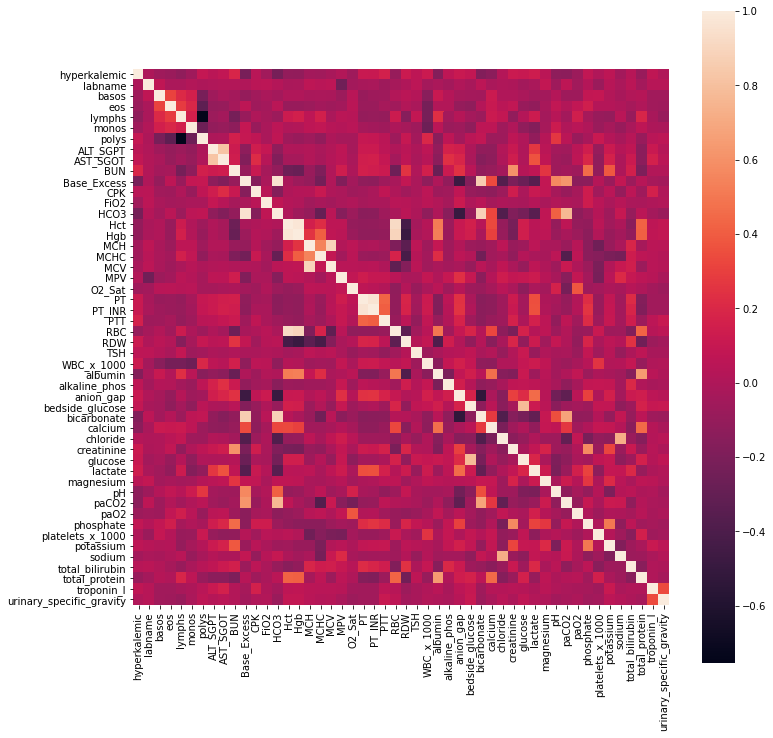

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(trimmed.corr(), square=True)

<AxesSubplot:>

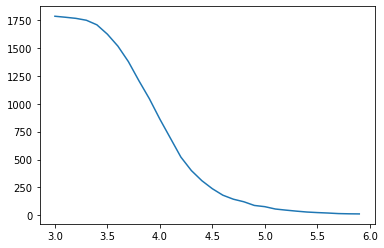

In [16]:
import numpy as np
vals = []
for threshold in range(30, 60, 1):
    vals.append((trimmed['potassium'] > threshold/10).sum())
sns.lineplot(np.arange(3, 6, 0.1), vals)

In [17]:
(trimmed['potassium'] > 5.5).sum()

24

In [18]:
trimmed['hyperkalemic'].sum()

1113

In [19]:
((trimmed['hyperkalemic'] == False) & (trimmed['potassium'] > 5)).sum()

18

In [20]:
trimmed['falsepositive'] = ((trimmed['hyperkalemic'] == False) & (trimmed['potassium'] > 5))

In [21]:
trimmed

,hyperkalemic,labname,basos,eos,lymphs,monos,polys,ALT_SGPT,AST_SGOT,BUN,...,paO2,phosphate,platelets_x_1000,potassium,sodium,total_bilirubin,total_protein,troponin_I,urinary_specific_gravity,falsepositive
patientunitstayid,,,,,,,,,,,,,,,,,,,,,
145427,True,17.5,0.0,1.000000,21.250000,9.75,67.00,29.000000,18.000000,16.500000,...,NaN,NaN,202.400000,4.350000,139.500000,0.800000,6.800000,NaN,1.0150,False
151179,True,70.0,NaN,2.000000,3.750000,6.40,84.00,15.000000,46.500000,51.666667,...,91.000000,NaN,498.600000,4.085714,144.666667,0.300000,5.200000,NaN,NaN,False
151900,True,111.5,0.0,2.000000,12.500000,5.50,77.50,51.000000,88.000000,17.000000,...,120.000000,NaN,417.250000,3.637500,136.200000,0.500000,6.300000,0.490000,1.0280,False
152954,True,135.5,0.0,0.250000,7.250000,7.25,85.25,22.000000,32.600000,12.400000,...,53.000000,2.25,213.200000,3.883333,138.400000,0.280000,6.440000,0.030000,1.0200,False
153972,True,147.0,0.5,4.000000,11.000000,11.00,73.50,33.000000,21.000000,29.000000,...,NaN,NaN,232.500000,4.150000,137.500000,0.500000,6.700000,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351763,False,59293.0,0.0,1.000000,15.000000,7.00,NaN,32.800000,39.200000,18.593750,...,82.333333,3.35,454.400000,3.983333,136.093750,0.280000,5.320000,NaN,1.0145,False
3352230,True,59433.0,0.0,0.000000,12.500000,9.00,NaN,21.000000,14.000000,20.900000,...,161.000000,3.10,254.846154,4.216667,136.500000,0.500000,6.800000,NaN,NaN,False
3352231,True,59476.0,1.0,1.000000,27.000000,11.00,NaN,22.000000,26.000000,19.333333,...,84.000000,NaN,192.200000,4.200000,136.333333,0.600000,6.800000,3.756667,NaN,False


In [22]:
trimmed.to_csv('demo_finished.csv')